<a href="https://colab.research.google.com/github/keirabasma/Formation-IA/blob/main/a_saoudi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [ ]:
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print(df.head())

Saving AAPL.csv to AAPL.csv
         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-29  100.589996  100.690002   98.040001   99.620003   93.514290   
1  2014-10-06   99.949997  102.379997   98.309998  100.730003   94.556244   
2  2014-10-13  101.330002  101.779999   95.180000   97.669998   91.683792   
3  2014-10-20   98.320000  105.489998   98.220001  105.220001   98.771042   
4  2014-10-27  104.849998  108.040001  104.699997  108.000000  101.380676   

      Volume  
0  142718700  
1  280258200  
2  358539800  
3  358532900  
4  220230600  


In [ ]:
data = pd.read_csv('AAPL.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


In [ ]:
data = pd.read_csv("AAPL.csv")

print("Shape:", data.shape)
print("\nData Types:")
print(data.dtypes)
print("\nMissing values:")
print(data.isna().sum())


Shape: (184, 7)

Data Types:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [ ]:
data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02
mean,127.040245,129.918098,124.340381,127.352663,123.838032,1.910168e+08
std,24.314449,24.577906,24.176736,24.356534,25.655569,8.160281e+07
min,92.389999,93.769997,89.470001,90.519997,87.796822,3.839850e+07
25%,108.882499,112.362499,106.152502,109.204998,105.301765,1.273706e+08
50%,118.895000,120.865002,116.870003,119.190002,114.999730,1.744112e+08
75%,144.935005,147.695000,143.227493,144.704994,143.039467,2.207755e+08
max,180.289993,183.500000,177.619995,179.979996,179.979996,5.003630e+08


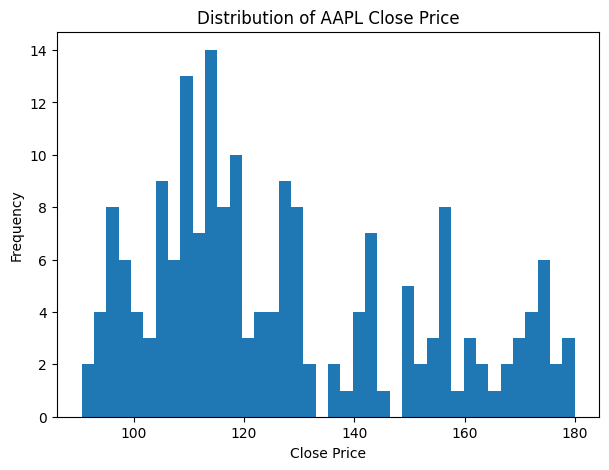

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(data["Close"], bins=40)
plt.title("Distribution of AAPL Close Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()


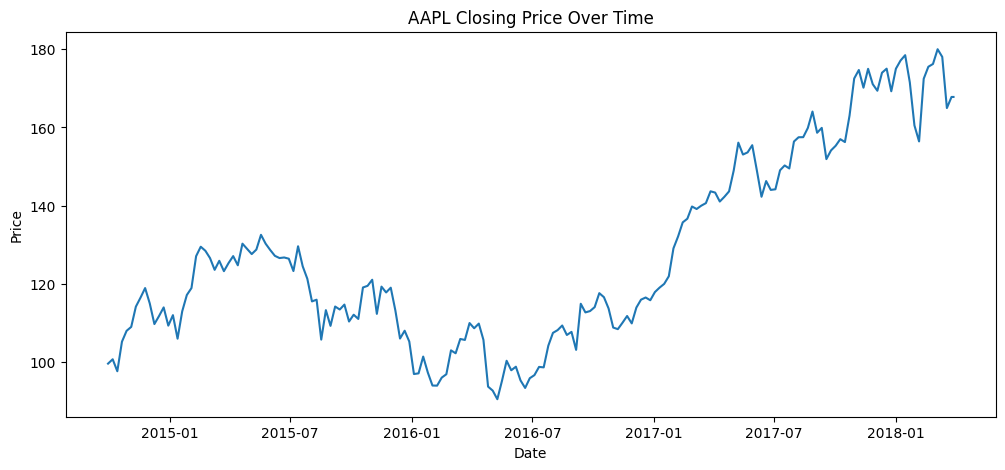

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(data.index, data["Close"])
plt.title("AAPL Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()



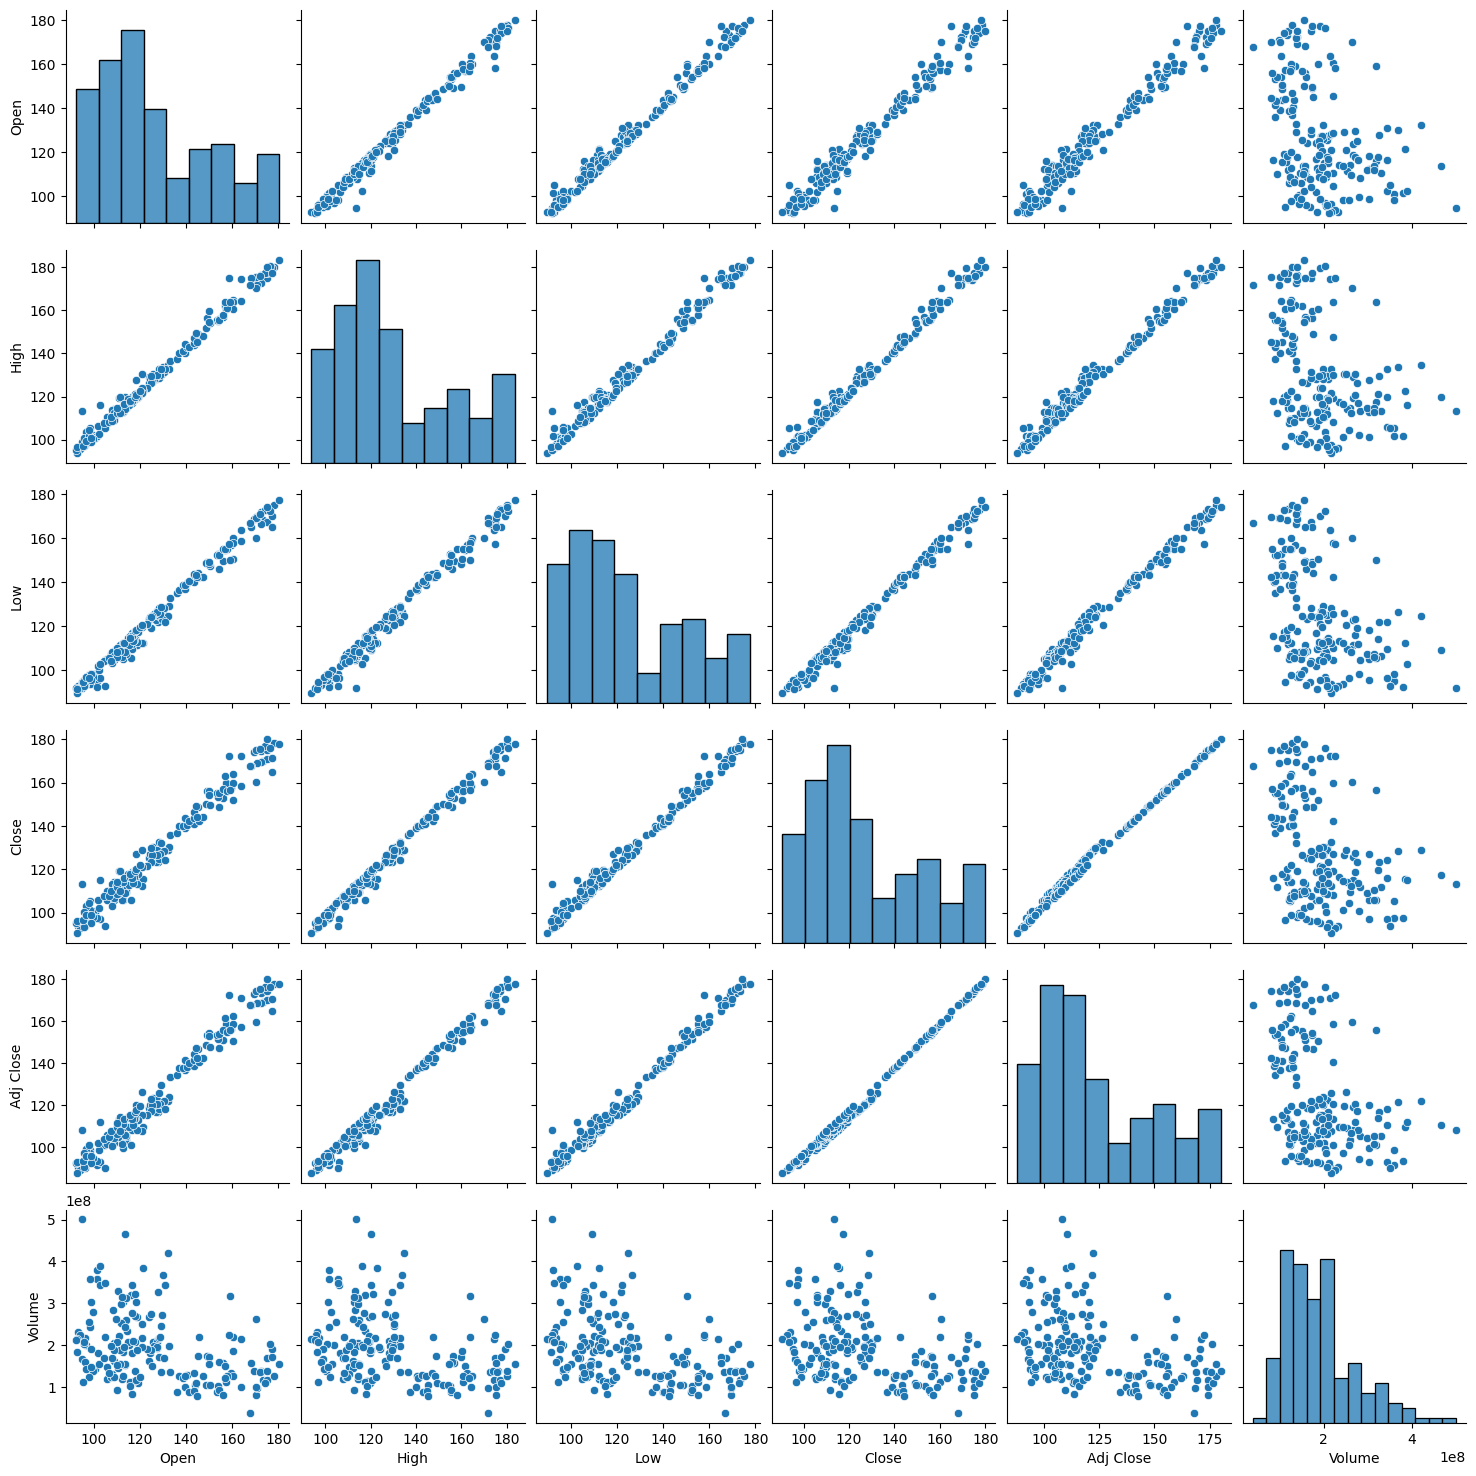

In [ ]:
sns.pairplot(data[["Open","High","Low","Close","Adj Close","Volume"]])


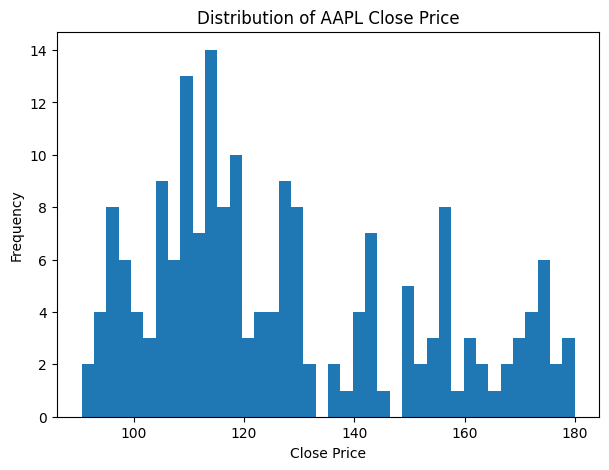

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(data["Close"], bins=40)
plt.title("Distribution of AAPL Close Price")
plt.xlabel("Close Price")
plt.ylabel("Frequency")
plt.show()



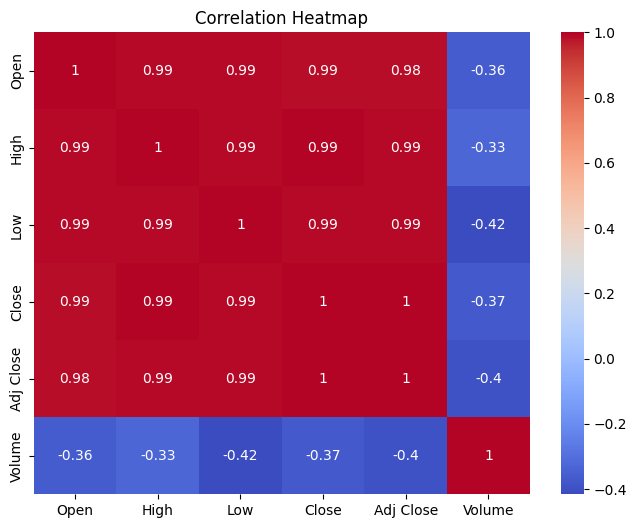

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


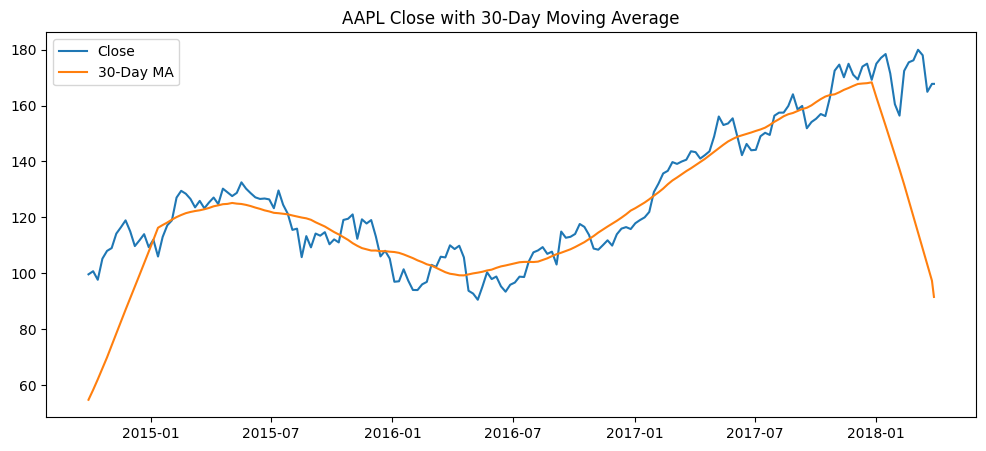

In [ ]:
data["MA_30"] = np.convolve(data["Close"], np.ones(30)/30, mode="same")

plt.figure(figsize=(12,5))
plt.plot(data["Close"], label="Close")
plt.plot(data["MA_30"], label="30-Day MA")
plt.legend()
plt.title("AAPL Close with 30-Day Moving Average")
plt.show()
